In [1]:
#coding : utf8

# import tensorflow as tf
# from tensorflow.examples.tutorials.mnist import input_data # tf1.14 读数据集
# data = input_data.read_data_sets('./MNIST_data', one_hot= True) #读取数据

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
mnist = tf.keras.datasets.mnist # tf2.0 读取数据


(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train.reshape((60000, 28*28))
x_test = x_test.reshape((10000, 28*28))
import warnings
warnings.filterwarnings("ignore")
import os

'''
1.数据
读取数据,划分训练集测试集labels,features
'''


print('x_train:',x_train.shape)
print('x_test: ',x_test.shape)
print('y_train:',y_train.shape)
print('y_test: ',y_test.shape)

Instructions for updating:
non-resource variables are not supported in the long term
x_train: (60000, 784)
x_test:  (10000, 784)
y_train: (60000,)
y_test:  (10000,)


In [2]:
import tensorflow

tensorflow.__version__

'1.13.1'

<class 'numpy.ndarray'>
(784,)
(28, 28)


Text(0.5, 1.0, 'The img of newData')

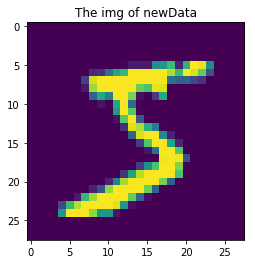

In [3]:

'''
have a look at the img of the first vector of x_train data
'''

img_data = x_train[0]
print(type(img_data))
# print(img_data)
print(img_data.shape)
import numpy as np
newData = np.reshape(img_data,(28,28))
print(newData.shape)


import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(newData)
plt.title("The img of newData")

In [4]:
# 选取部分数据训练与测试
# 打乱数据
index=np.arange(60000)
np.random.shuffle(index)
# print(index[0:20])

train_part_x, train_part_y = x_train[index,:], y_train[index]
test_part_x, test_part_y = x_test[:2000], y_test[:2000]
print(train_part_x.shape)
print(train_part_y.shape)

# 处理标签（对标签进行分类编码）
from keras.utils import to_categorical
train_part_y = to_categorical(train_part_y)
test_part_y = to_categorical(test_part_y)
print(train_part_y[0])
train_part_y.shape

(60000, 784)
(60000,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


Using TensorFlow backend.


(60000, 10)

In [54]:
 
'''
2.参数
本文使用两层隐藏层,各层neuron个数分别为:
input_layer: 28*28 (features of train_x or test_x)
hidden_layer1: 256
hidden_layer2: 128
output_layer: 10
'''

n_input = 28 * 28
n_hidden_layer_1 = 128
n_hidden_layer_2 = 64
n_output_layer = 10

x = tf.placeholder(tf.float32, [None, n_input])
y = tf.placeholder(tf.float32, [None, n_output_layer])

# 生成指定shape的随机张量
w = {
    'w1': tf.Variable(tf.random_normal([n_input, n_hidden_layer_1],seed=10001),dtype= tf.float32),
    'w2': tf.Variable(tf.random_normal([n_hidden_layer_1, n_hidden_layer_2],seed=10001),dtype= tf.float32),
    'w_out': tf.Variable(tf.random_normal([n_hidden_layer_2, n_output_layer],seed=10001),dtype= tf.float32)
}
# 生成全零的偏置张量
b = {
    'b1': tf.Variable(tf.zeros([1,n_hidden_layer_1]), dtype= tf.float32),
    'b2': tf.Variable(tf.zeros([1,n_hidden_layer_2]), dtype= tf.float32),
    'b_out': tf.Variable(tf.zeros([1,n_output_layer]), dtype= tf.float32)
}


In [55]:
 
'''
3.前向传播
'''
 
def forward_propagation(_x, _w, _b):
    layer1 = tf.nn.relu(tf.add(tf.matmul(_x, _w['w1']), _b['b1']))
    layer2 = tf.nn.relu(tf.add(tf.matmul(layer1, _w['w2']), _b['b2']))
    return tf.add(tf.matmul(layer2, _w['w_out']), _b['b_out'])
 

In [56]:

'''
4.损失函数
'''

learn_rate = 0.001
y_predict = forward_propagation(x, w, b)
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits= y_predict, labels= y))
optm = tf.train.GradientDescentOptimizer(learn_rate).minimize(loss)


In [57]:
 
'''
5.评价
'''
result = tf.equal(tf.math.argmax(y_predict, 1), tf.math.argmax(y, 1))
# tf.cast改变张量类型
acc = tf.reduce_mean(tf.cast(result, dtype=tf.float32))


In [58]:

'''
6.训练和保存
'''
epochs = 100
batch_size = 128
init = tf.global_variables_initializer()

save_path = './000/'
if not save_path:
    os.makedir(save_path)
saver = tf.train.Saver(max_to_keep=3)
with tf.Session() as sess:
    sess.run(init)
    for i in range(epochs):
        cost = count = 0.0
        for batch_index in range(0, train_part_y.shape[0], batch_size):
            count += 1
            feed = {x: train_part_x[batch_index: batch_index + batch_size], y: train_part_y[batch_index: batch_index + batch_size]}
            sess.run(optm, feed_dict= feed)
            cost += sess.run(loss, feed_dict= feed)
        cost /= count
        # 测试集精度
        feed_test = {x: test_part_x, y: test_part_y}
        accuracy = sess.run(acc, feed_dict= feed_test)
        # 保存模型
        # # saver.save(sess, os.path.join(save_path,global_step = i+1))
        saver.save(sess, save_path, global_step = i+1)
        if i% 5 == 0 or i+1==epochs:
            print('epoch:{:>3d}, 损失值:{:>6.3f}, 分类准确率:{:.3f}'.format(i+1, cost, accuracy))

epoch:  1, 损失值:88.514, 分类准确率:0.568
epoch:  6, 损失值: 9.522, 分类准确率:0.688
epoch: 11, 损失值: 4.023, 分类准确率:0.685
epoch: 16, 损失值: 1.961, 分类准确率:0.668
epoch: 21, 损失值: 1.329, 分类准确率:0.643
epoch: 26, 损失值: 1.124, 分类准确率:0.646
epoch: 31, 损失值: 1.017, 分类准确率:0.660
epoch: 36, 损失值: 0.945, 分类准确率:0.666
epoch: 41, 损失值: 0.890, 分类准确率:0.679
epoch: 46, 损失值: 0.846, 分类准确率:0.689
epoch: 51, 损失值: 0.808, 分类准确率:0.695
epoch: 56, 损失值: 0.776, 分类准确率:0.704
epoch: 61, 损失值: 0.746, 分类准确率:0.714
epoch: 66, 损失值: 0.719, 分类准确率:0.720
epoch: 71, 损失值: 0.696, 分类准确率:0.727
epoch: 76, 损失值: 0.676, 分类准确率:0.732
epoch: 81, 损失值: 0.659, 分类准确率:0.737
epoch: 86, 损失值: 0.645, 分类准确率:0.743
epoch: 91, 损失值: 0.632, 分类准确率:0.746
epoch: 96, 损失值: 0.620, 分类准确率:0.748
epoch:100, 损失值: 0.611, 分类准确率:0.751


[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


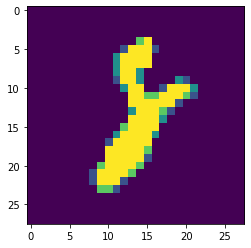

In [75]:
i = 5
img = np.reshape(train_part_x[i],(28,28)) 
plt.imshow(img)
print(train_part_y[i])